In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
PM_map = pd.read_csv('../data2/a1/PM_map.csv')

PM_map

,รหัสสถานี,ชื่อสถานี,รายละเอียดจุดติดตั้งสถานี,จังหวัด,english_name,adm1__id
0,02T,แขวงหิรัญรูจี เขตธนบุรี กทม.,มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา,กทม.,Bangkok Metropolis,3.0
1,05T,แขวงบางนา เขตบางนา กทม.,กรมอุตุนิยมวิทยา,กทม.,Bangkok Metropolis,3.0
2,10T,แขวงคลองจั่น เขตบางกะปิ กทม.,เคหะชุมชนคลองจั่น,กทม.,Bangkok Metropolis,3.0
3,11T,แขวงดินแดง เขตดินแดง กทม.,สนามกีฬาเคหะชุมชนห้วยขวาง,กทม.,Bangkok Metropolis,3.0
4,12T,แขวงช่องนนทรี เขตยานนาวา กทม.,โรงเรียนนนทรีวิทยา,กทม.,Bangkok Metropolis,3.0
...,...,...,...,...,...,...
91,63T,ต.สะเตง อ.เมือง จ.ยะลา,สวนสาธารณะสนามโรงพิธีช้างเผือก ยะลา,จ.ยะลา,Yala,76.0
92,78T,ต.เบตง อ.เบตง จ.ยะลา,ศูนย์พัฒนาเด็กเล็กเทศบาลเมืองเบตง,จ.ยะลา,Yala,76.0
93,80T,ต.พิมาน อ.เมือง. จ.สตูล,ศาลากลางจังหวัดสตูล,จ.สตูล,Satun,61.0
94,89T,ต.คลัง อ.เมือง จ.นครศรีธรรมราช,ศูนย์ฟื้นฟูสุขภาพผู้สูงอายุ,จ.นครศรีธรรมราช,Nakhon Si Thammarat,31.0


In [79]:
indicator = pd.read_csv('../data2/a1/indicator.csv')

indicator

,province_name,province_lat,province_lon,English_name,AREA
0,กรุงเทพมหานคร,13.727896,100.524123,Bangkok Metropolis,1571.371336
1,กาญจนบุรี,14.022780,99.532811,Kanchanaburi,19450.911388
2,ขอนแก่น,16.441935,102.835992,Khon Kaen,10612.202446
3,ชลบุรี,13.361143,100.984672,Chon Buri,4504.763605
4,เชียงใหม่,18.787748,98.993131,Chiang Mai,22176.037103
5,ภูเก็ต,7.981050,98.363882,Phuket,548.025456


In [80]:
adm1_list = [3,16,17,12,10,48]
indicator['adm1'] = pd.Series(adm1_list)

indicator

,province_name,province_lat,province_lon,English_name,AREA,adm1
0,กรุงเทพมหานคร,13.727896,100.524123,Bangkok Metropolis,1571.371336,3
1,กาญจนบุรี,14.022780,99.532811,Kanchanaburi,19450.911388,16
2,ขอนแก่น,16.441935,102.835992,Khon Kaen,10612.202446,17
3,ชลบุรี,13.361143,100.984672,Chon Buri,4504.763605,12
4,เชียงใหม่,18.787748,98.993131,Chiang Mai,22176.037103,10
5,ภูเก็ต,7.981050,98.363882,Phuket,548.025456,48


In [81]:
from math import radians, cos, sin, sqrt, asin

def is_within_radius(lat, lon, center_lat, center_lon, radius_km=70):
    # แปลงองศาเป็นเรเดียน
    lat, lon, center_lat, center_lon = map(radians, [lat, lon, center_lat, center_lon])

    # คำนวณระยะทางด้วย haversine formula
    dlon = lon - center_lon
    dlat = lat - center_lat
    a = sin(dlat/2)**2 + cos(center_lat) * cos(lat) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  
    distance = r * c

    # ตรวจสอบระยะทาง
    return distance <= radius_km


In [82]:
fire_achive_raw = pd.read_csv('../data1/FIRM-NASA-fire-alert-data/DL_FIRE_M-C61_591394/fire_archive_M-C61_591394.csv')

fire_achive_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650623 entries, 0 to 650622
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    650623 non-null  float64
 1   longitude   650623 non-null  float64
 2   brightness  650623 non-null  float64
 3   scan        650623 non-null  float64
 4   track       650623 non-null  float64
 5   acq_date    650623 non-null  object 
 6   acq_time    650623 non-null  int64  
 7   satellite   650623 non-null  object 
 8   instrument  650623 non-null  object 
 9   confidence  650623 non-null  int64  
 10  version     650623 non-null  float64
 11  bright_t31  650623 non-null  float64
 12  frp         650623 non-null  float64
 13  daynight    650623 non-null  object 
 14  type        650623 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 74.5+ MB


In [83]:
fire_achive_raw_more = pd.read_csv('../data1/FIRM-NASA-fire-alert-data/DL_FIRE_M-C61_591394/fire_nrt_M-C61_591394.csv')

fire_achive_raw_more['acq_date'] = pd.to_datetime(fire_achive_raw_more['acq_date'], format='%Y-%m-%d')

fire_achive_raw_more['day'] = fire_achive_raw_more['acq_date'].dt.day
fire_achive_raw_more['month'] = fire_achive_raw_more['acq_date'].dt.month
fire_achive_raw_more['year'] = fire_achive_raw_more['acq_date'].dt.year

fire_achive_more = fire_achive_raw_more[(fire_achive_raw_more['year'] == 2024) & (fire_achive_raw_more['month'] == 12)]

fire_achive_more

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,day,month,year
0,14.81086,101.02091,312.45,1.01,1.01,2024-12-01,257,Terra,MODIS,62,6.1NRT,298.95,5.89,D,1,12,2024
1,16.89908,102.93216,312.33,1.02,1.01,2024-12-01,257,Terra,MODIS,64,6.1NRT,297.36,4.89,D,1,12,2024
2,16.99467,100.29537,313.08,1.10,1.04,2024-12-01,257,Terra,MODIS,70,6.1NRT,296.57,6.00,D,1,12,2024
3,16.20995,103.15241,311.86,1.03,1.02,2024-12-01,257,Terra,MODIS,58,6.1NRT,299.51,5.25,D,1,12,2024
4,16.32616,101.98114,309.12,1.00,1.00,2024-12-01,257,Terra,MODIS,58,6.1NRT,297.05,3.96,D,1,12,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,14.54065,100.62626,315.82,1.36,1.16,2024-12-31,314,Terra,MODIS,68,6.1NRT,295.46,16.55,D,31,12,2024
1448,14.21535,99.07667,309.95,1.12,1.06,2024-12-31,314,Terra,MODIS,57,6.1NRT,297.03,5.45,D,31,12,2024
1449,8.57191,99.33247,313.67,1.37,1.16,2024-12-31,317,Terra,MODIS,69,6.1NRT,296.20,12.45,D,31,12,2024
1450,16.24932,104.12816,300.27,2.01,1.38,2024-12-31,1403,Terra,MODIS,23,6.1NRT,282.33,15.24,N,31,12,2024


In [84]:
fire_achive_raw['acq_date'] = pd.to_datetime(fire_achive_raw['acq_date'], format='%Y-%m-%d')

fire_achive_raw['day'] = fire_achive_raw['acq_date'].dt.day
fire_achive_raw['month'] = fire_achive_raw['acq_date'].dt.month
fire_achive_raw['year'] = fire_achive_raw['acq_date'].dt.year

fire_achive = fire_achive_raw[(fire_achive_raw['year'] >= 2014) & (fire_achive_raw['year'] <= 2024)]

fire_achive

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year
392137,14.9725,102.5822,305.6,4.5,2.0,2014-01-01,306,Terra,MODIS,53,6.03,291.7,29.1,D,0,1,1,2014
392138,16.5087,104.5704,312.1,1.4,1.2,2014-01-01,611,Aqua,MODIS,62,6.03,298.6,10.3,D,0,1,1,2014
392139,14.0743,99.8167,310.1,3.6,1.8,2014-01-01,611,Aqua,MODIS,58,6.03,295.7,29.7,D,0,1,1,2014
392140,14.0826,99.8111,308.8,3.6,1.8,2014-01-01,611,Aqua,MODIS,52,6.03,295.8,25.0,D,0,1,1,2014
392141,14.5416,102.2427,313.1,2.3,1.5,2014-01-01,611,Aqua,MODIS,63,6.03,299.6,16.8,D,0,1,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650618,17.6152,101.8280,310.3,1.1,1.1,2024-11-30,716,Aqua,MODIS,58,61.03,298.3,6.2,D,0,30,11,2024
650619,17.8756,104.1100,312.0,1.0,1.0,2024-11-30,716,Aqua,MODIS,63,61.03,299.7,5.7,D,0,30,11,2024
650620,17.0863,100.3943,314.4,1.4,1.2,2024-11-30,716,Aqua,MODIS,68,61.03,299.9,9.7,D,0,30,11,2024
650621,19.6949,100.1696,310.0,1.3,1.1,2024-11-30,717,Aqua,MODIS,19,61.03,291.7,6.5,D,0,30,11,2024


In [85]:
fire_achive = pd.concat([fire_achive, fire_achive_more], ignore_index=True)

fire_achive

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year
0,14.97250,102.58220,305.60,4.50,2.00,2014-01-01,306,Terra,MODIS,53,6.03,291.70,29.10,D,0.0,1,1,2014
1,16.50870,104.57040,312.10,1.40,1.20,2014-01-01,611,Aqua,MODIS,62,6.03,298.60,10.30,D,0.0,1,1,2014
2,14.07430,99.81670,310.10,3.60,1.80,2014-01-01,611,Aqua,MODIS,58,6.03,295.70,29.70,D,0.0,1,1,2014
3,14.08260,99.81110,308.80,3.60,1.80,2014-01-01,611,Aqua,MODIS,52,6.03,295.80,25.00,D,0.0,1,1,2014
4,14.54160,102.24270,313.10,2.30,1.50,2014-01-01,611,Aqua,MODIS,63,6.03,299.60,16.80,D,0.0,1,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259933,14.54065,100.62626,315.82,1.36,1.16,2024-12-31,314,Terra,MODIS,68,6.1NRT,295.46,16.55,D,NaN,31,12,2024
259934,14.21535,99.07667,309.95,1.12,1.06,2024-12-31,314,Terra,MODIS,57,6.1NRT,297.03,5.45,D,NaN,31,12,2024
259935,8.57191,99.33247,313.67,1.37,1.16,2024-12-31,317,Terra,MODIS,69,6.1NRT,296.20,12.45,D,NaN,31,12,2024
259936,16.24932,104.12816,300.27,2.01,1.38,2024-12-31,1403,Terra,MODIS,23,6.1NRT,282.33,15.24,N,NaN,31,12,2024


In [86]:
PM2_5 = pd.read_csv('../data1/pm2-5/combined_pm2.5_2011_2024_daily_microgramperm3.csv')

PM2_5['Date'] = pd.to_datetime(PM2_5['Date'])

PM2_5['Year'] = PM2_5['Date'].dt.year

PM2_5 = PM2_5[(PM2_5['Year'] >= 2014) & (PM2_5['Year'] <= 2024)]

PM2_5

,Date,02T,05T,10T,11T,12T,59T,61T,03T,50T,...,61T,52T,08T,27T,77T,70T*,70T**,72T(เก่า),72T(ใหม่),Year
0,2024-12-31,37.1,33.9,32.9,30.0,30.1,21.9,29.5,32.5,34.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
1,2024-12-30,40.0,28.4,28.2,28.4,28.1,26.2,27.1,34.3,33.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
2,2024-12-29,25.8,20.1,20.4,20.6,20.7,17.0,20.1,22.3,23.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
3,2024-12-28,28.2,22.9,22.5,22.8,23.4,17.0,22.6,25.6,28.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
4,2024-12-27,47.4,35.4,35.8,35.4,35.9,23.2,34.6,43.9,41.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2014-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
4014,2014-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
4015,2014-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014
4016,2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014


In [87]:
# Extract Fire Achive Chiang Mai data
fire_achive_chiang_mai = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 18.787748, 98.993131),
        axis=1
    )
]

fire_achive_chiang_mai['adm1'] = 10

fire_achive_chiang_mai

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22180\3111070819.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_chiang_mai['adm1'] = 10


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
118,18.31320,99.31980,313.20,1.10,1.00,2014-01-02,654,Aqua,MODIS,64,6.03,299.80,6.40,D,0.0,2,1,2014,10
335,18.65760,98.38050,310.30,1.10,1.10,2014-01-04,642,Aqua,MODIS,63,6.03,298.70,6.50,D,0.0,4,1,2014,10
338,18.69650,98.33580,307.30,1.80,1.30,2014-01-04,1607,Terra,MODIS,71,6.03,286.70,22.90,N,0.0,4,1,2014,10
339,18.69590,98.33610,300.00,1.60,1.30,2014-01-04,1854,Aqua,MODIS,13,6.03,285.20,12.20,N,0.0,4,1,2014,10
341,18.69100,98.33910,316.50,1.20,1.10,2014-01-05,418,Terra,MODIS,75,6.03,295.80,16.20,D,0.0,5,1,2014,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259752,18.96964,98.39062,307.19,1.05,1.02,2024-12-28,748,Aqua,MODIS,50,6.1NRT,294.85,5.90,D,NaN,28,12,2024,10
259814,18.58739,98.64102,305.26,1.29,1.13,2024-12-30,726,Aqua,MODIS,38,6.1NRT,294.00,6.15,D,NaN,30,12,2024,10
259817,19.07896,99.07642,307.59,1.20,1.09,2024-12-30,726,Aqua,MODIS,57,6.1NRT,296.97,6.40,D,NaN,30,12,2024,10
259820,19.23373,98.88801,307.77,1.22,1.10,2024-12-30,726,Aqua,MODIS,57,6.1NRT,295.26,7.17,D,NaN,30,12,2024,10


In [88]:
# Extract PM2.5 Chiang Mai data
PM_chiang_mai_raw = PM_map[PM_map['adm1__id'] == 10]

stations = list(PM_chiang_mai_raw['รหัสสถานี'])
stations.append('Date')

PM_chiang_mai = PM2_5.loc[:,stations]
PM_chiang_mai['avg_pm'] = PM_chiang_mai.drop(columns='Date').mean(axis=1)
PM_chiang_mai['adm1'] = 10

PM_chiang_mai = PM_chiang_mai[['Date','avg_pm','adm1']]

PM_chiang_mai

,Date,avg_pm,adm1
0,2024-12-31,24.05,10
1,2024-12-30,25.20,10
2,2024-12-29,22.15,10
3,2024-12-28,20.10,10
4,2024-12-27,25.45,10
...,...,...,...
4013,2014-01-05,47.00,10
4014,2014-01-04,42.00,10
4015,2014-01-03,45.00,10
4016,2014-01-02,39.00,10


In [89]:
# Extract Weather Bangkok Data
chiangmai_weather = pd.read_csv('../data1/weather/chiangmai_weather.csv')

chiangmai_weather['date'] = pd.to_datetime(chiangmai_weather['date'], format='%d/%m/%Y')
chiangmai_weather['Year'] = chiangmai_weather['date'].dt.year

chiangmai_weather = chiangmai_weather[(chiangmai_weather['Year'] >= 2014) & (chiangmai_weather['Year'] <= 2024)]

chiangmai_weather

,date,temperature_max,temperature_avg,temperature_min,dew_point_max,dew_point_avg,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,precipitation,Year
0,2014-01-01,81,67.395833,57,61,57.062500,52,94,73.083333,37,8,3.586207,1,29.02,28.935000,28.84,NaN,2014
1,2014-01-02,84,69.333333,59,64,58.844444,57,94,72.355556,42,6,2.740741,1,28.96,28.894667,28.82,NaN,2014
2,2014-01-03,86,70.608696,61,64,60.260870,57,94,72.717391,40,6,4.238095,2,28.99,28.877391,28.79,NaN,2014
3,2014-01-04,84,71.395833,61,66,61.541667,59,94,73.458333,45,7,3.192308,1,28.96,28.873958,28.82,NaN,2014
4,2014-01-05,84,72.489362,64,66,63.531915,61,94,74.893617,48,8,3.517241,1,28.93,28.829787,28.76,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2024-12-27,86,72.000000,61,66,62.791667,61,100,75.854167,43,5,2.104167,0,29.04,28.955625,28.87,NaN,2024
4014,2024-12-28,86,73.812500,63,66,64.041667,61,100,73.895833,45,5,1.833333,0,29.04,28.959375,28.87,NaN,2024
4015,2024-12-29,84,73.750000,64,66,63.979167,61,100,74.166667,45,7,2.812500,0,29.02,28.919792,28.82,NaN,2024
4016,2024-12-30,86,74.312500,64,66,64.041667,63,94,72.375000,45,6,2.708333,0,28.96,28.887292,28.82,NaN,2024


In [ ]:
# Merge chiangmai Dataframe
chiangmai_df = pd.merge(
    fire_achive_chiang_mai,
    PM_chiang_mai,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

chiangmai_df = pd.merge(
    chiangmai_df,
    chiangmai_weather,
    left_on='Date',
    right_on='date',
    how='left'
)

chiangmai_df['final_date'] = chiangmai_df['acq_date'].combine_first(chiangmai_df['Date']).combine_first(chiangmai_df['date'])

chiangmai_df = chiangmai_df.drop(['acq_date', 'Date', 'date', 'precipitation', 'satellite', 'instrument', 'acq_time','version', 'daynight', 'day', 'month', 'year', 'type'], axis=1)

chiangmai_df['latitude'] = chiangmai_df['latitude'].fillna(chiangmai_df['latitude'].mean())
chiangmai_df['longitude'] = chiangmai_df['longitude'].fillna(chiangmai_df['longitude'].mean())
chiangmai_df['brightness'] = chiangmai_df['brightness'].fillna(chiangmai_df['brightness'].mean())
chiangmai_df['scan'] = chiangmai_df['scan'].fillna(chiangmai_df['scan'].mean())
chiangmai_df['track'] = chiangmai_df['track'].fillna(chiangmai_df['track'].mean())
chiangmai_df['confidence'] = chiangmai_df['confidence'].fillna(chiangmai_df['confidence'].mean())
chiangmai_df['bright_t31'] = chiangmai_df['bright_t31'].fillna(chiangmai_df['bright_t31'].mean())
chiangmai_df['frp'] = chiangmai_df['frp'].fillna(chiangmai_df['frp'].mean())
chiangmai_df['avg_pm'] = chiangmai_df['avg_pm'].fillna(chiangmai_df['avg_pm'].mean())

chiangmai_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12241 entries, 0 to 12240
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   latitude         12241 non-null  float64       
 1   longitude        12241 non-null  float64       
 2   brightness       12241 non-null  float64       
 3   scan             12241 non-null  float64       
 4   track            12241 non-null  float64       
 5   confidence       12241 non-null  float64       
 6   bright_t31       12241 non-null  float64       
 7   frp              12241 non-null  float64       
 8   adm1             12241 non-null  int64         
 9   avg_pm           12241 non-null  float64       
 10  temperature_max  12241 non-null  int64         
 11  temperature_avg  12241 non-null  float64       
 12  temperature_min  12241 non-null  int64         
 13  dew_point_max    12241 non-null  int64         
 14  dew_point_avg    12241 non-null  float

In [113]:
chiangmai_df.to_csv('../data1/merge_data/chiangmai_data.csv')

In [91]:
# Extract Fire Achive Bangkok data
fire_achive_bangkok = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 13.727896, 100.524123),
        axis=1
    )
]

fire_achive_bangkok['adm1'] = 3

fire_achive_bangkok

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22180\2152698000.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_bangkok['adm1'] = 3


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
95,13.73220,100.77870,314.20,1.10,1.10,2014-01-02,653,Aqua,MODIS,34,6.03,301.30,4.50,D,2.0,2,1,2014,3
97,13.92620,100.85670,312.30,1.20,1.10,2014-01-02,653,Aqua,MODIS,38,6.03,301.40,5.80,D,0.0,2,1,2014,3
275,14.20000,100.93330,319.40,1.00,1.00,2014-01-04,641,Aqua,MODIS,70,6.03,304.40,8.90,D,0.0,4,1,2014,3
286,13.61560,99.97700,312.10,1.10,1.00,2014-01-04,641,Aqua,MODIS,47,6.03,301.70,4.90,D,0.0,4,1,2014,3
292,14.09910,100.80720,312.60,1.00,1.00,2014-01-04,641,Aqua,MODIS,48,6.03,302.20,4.50,D,0.0,4,1,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259829,13.84498,101.09032,315.40,1.10,1.05,2024-12-30,726,Aqua,MODIS,58,6.1NRT,301.19,8.79,D,NaN,30,12,2024,3
259832,14.07165,100.64128,318.14,1.15,1.07,2024-12-30,726,Aqua,MODIS,45,6.1NRT,300.67,6.61,D,NaN,30,12,2024,3
259833,14.08101,100.63972,320.77,1.15,1.07,2024-12-30,726,Aqua,MODIS,71,6.1NRT,302.32,9.87,D,NaN,30,12,2024,3
259834,14.12412,100.68935,316.27,1.14,1.06,2024-12-30,726,Aqua,MODIS,65,6.1NRT,302.56,8.09,D,NaN,30,12,2024,3


In [92]:
# Extract PM2.5 Bangkok data
PM_bangkok_raw = PM_map[PM_map['adm1__id'] == 3]

stations = list(PM_bangkok_raw['รหัสสถานี'])
stations.append('Date')

PM_bangkok = PM2_5.loc[:,stations]
PM_bangkok['avg_pm'] = PM_bangkok.drop(columns='Date').mean(axis=1)
PM_bangkok['adm1'] = 3

PM_bangkok = PM_bangkok[['Date','avg_pm','adm1']]

PM_bangkok

,Date,avg_pm,adm1
0,2024-12-31,32.325000,3
1,2024-12-30,31.600000,3
2,2024-12-29,21.908333,3
3,2024-12-28,24.716667,3
4,2024-12-27,38.658333,3
...,...,...,...
4013,2014-01-05,NaN,3
4014,2014-01-04,NaN,3
4015,2014-01-03,NaN,3
4016,2014-01-02,NaN,3


In [93]:
# Extract Weather Bangkok Data
bangkok_weather = pd.read_csv('../data1/weather/bangkok_weather.csv')

bangkok_weather['date'] = pd.to_datetime(bangkok_weather['date'])
bangkok_weather['Year'] = bangkok_weather['date'].dt.year

bangkok_weather = bangkok_weather[(bangkok_weather['Year'] >= 2014) & (bangkok_weather['Year'] <= 2024)]

bangkok_weather

,date,temperature_max,temperature_avg,temperature_min,dew_point_max,dew_point_avg,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,precipitation,Year
115,2024-12-01,88.0,80.5,73.0,66.0,63.7,61.0,73.0,57.6,40.0,9.0,6.0,3.0,29.9,29.8,29.7,0.0,2024
116,2024-12-02,91.0,82.3,73.0,68.0,65.8,63.0,78.0,58.9,38.0,9.0,5.4,2.0,29.9,29.8,29.7,0.0,2024
117,2024-12-03,91.0,84.3,77.0,70.0,68.3,66.0,78.0,59.8,43.0,8.0,5.5,3.0,29.9,29.8,29.7,0.0,2024
118,2024-12-04,91.0,84.8,77.0,73.0,69.3,66.0,89.0,61.1,46.0,15.0,6.4,1.0,29.9,29.8,29.7,0.0,2024
119,2024-12-05,90.0,84.1,77.0,72.0,69.2,66.0,78.0,61.8,46.0,10.0,4.8,0.0,29.9,29.8,29.7,0.0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,2014-01-27,88.0,78.2,66.0,68.0,63.5,59.0,100.0,63.2,38.0,10.0,3.6,0.0,30.0,29.9,29.8,0.0,2014
4129,2014-01-28,90.0,79.8,68.0,64.0,60.8,52.0,78.0,54.8,29.0,12.0,4.1,0.0,30.0,29.9,29.8,0.0,2014
4130,2014-01-29,90.0,80.5,70.0,72.0,64.0,57.0,94.0,60.3,33.0,10.0,2.8,0.0,30.0,29.9,29.8,0.0,2014
4131,2014-01-30,90.0,80.3,70.0,68.0,62.5,57.0,94.0,57.1,33.0,12.0,4.5,0.0,30.0,29.9,29.8,0.0,2014


In [94]:
# Merge Bangkok Dataframe
bangkok_df = pd.merge(
    fire_achive_bangkok,
    PM_bangkok,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

bangkok_df = pd.merge(
    bangkok_df,
    bangkok_weather,
    left_on='Date',
    right_on='date',
    how='left'
)

bangkok_df['final_date'] = bangkok_df['acq_date'].combine_first(bangkok_df['Date']).combine_first(bangkok_df['date'])

bangkok_df = bangkok_df.drop(['acq_date', 'Date', 'date', 'precipitation', 'satellite', 'instrument', 'acq_time','version', 'daynight', 'day', 'month', 'year', 'type'], axis=1)

bangkok_df['latitude'] = bangkok_df['latitude'].fillna(bangkok_df['latitude'].mean())
bangkok_df['longitude'] = bangkok_df['longitude'].fillna(bangkok_df['longitude'].mean())
bangkok_df['brightness'] = bangkok_df['brightness'].fillna(bangkok_df['brightness'].mean())
bangkok_df['scan'] = bangkok_df['scan'].fillna(bangkok_df['scan'].mean())
bangkok_df['track'] = bangkok_df['track'].fillna(bangkok_df['track'].mean())
bangkok_df['confidence'] = bangkok_df['confidence'].fillna(bangkok_df['confidence'].mean())
bangkok_df['bright_t31'] = bangkok_df['bright_t31'].fillna(bangkok_df['bright_t31'].mean())
bangkok_df['frp'] = bangkok_df['frp'].fillna(bangkok_df['frp'].mean())
bangkok_df['avg_pm'] = bangkok_df['avg_pm'].fillna(bangkok_df['avg_pm'].mean())

bangkok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7828 entries, 0 to 7827
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   latitude         7828 non-null   float64       
 1   longitude        7828 non-null   float64       
 2   brightness       7828 non-null   float64       
 3   scan             7828 non-null   float64       
 4   track            7828 non-null   float64       
 5   confidence       7828 non-null   float64       
 6   bright_t31       7828 non-null   float64       
 7   frp              7828 non-null   float64       
 8   adm1             7828 non-null   int64         
 9   avg_pm           7828 non-null   float64       
 10  temperature_max  7828 non-null   float64       
 11  temperature_avg  7828 non-null   float64       
 12  temperature_min  7828 non-null   float64       
 13  dew_point_max    7828 non-null   float64       
 14  dew_point_avg    7828 non-null   float64

In [114]:
bangkok_df.to_csv('../data1/merge_data/bangkok_data.csv')

In [95]:
# Extract Fire Achive Khon Kaen data
fire_achive_khon_kaen = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 16.441935, 102.835992),
        axis=1
    )
]

fire_achive_khon_kaen['adm1'] = 17
fire_achive_khon_kaen

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22180\1095050823.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_khon_kaen['adm1'] = 17


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
17,16.38430,103.14560,315.70,1.80,1.30,2014-01-01,611,Aqua,MODIS,67,6.03,299.80,17.70,D,0.0,1,1,2014,17
19,16.72310,103.36770,313.00,1.70,1.30,2014-01-01,611,Aqua,MODIS,64,6.03,298.90,10.70,D,0.0,1,1,2014,17
29,16.90410,102.80700,311.90,1.00,1.00,2014-01-02,348,Terra,MODIS,56,6.03,298.40,4.10,D,0.0,2,1,2014,17
30,16.84290,102.78200,314.50,1.00,1.00,2014-01-02,348,Terra,MODIS,66,6.03,299.80,6.30,D,0.0,2,1,2014,17
33,16.59100,103.05220,316.20,1.00,1.00,2014-01-02,348,Terra,MODIS,68,6.03,299.60,8.10,D,0.0,2,1,2014,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259898,16.58174,103.17198,316.39,1.02,1.01,2024-12-30,726,Aqua,MODIS,61,6.1NRT,305.17,5.19,D,NaN,30,12,2024,17
259900,16.62088,102.86817,335.56,1.01,1.00,2024-12-30,726,Aqua,MODIS,87,6.1NRT,306.26,26.52,D,NaN,30,12,2024,17
259901,16.61956,102.85899,320.11,1.01,1.00,2024-12-30,726,Aqua,MODIS,66,6.1NRT,304.59,8.05,D,NaN,30,12,2024,17
259915,16.27560,102.27668,310.14,1.66,1.27,2024-12-31,314,Terra,MODIS,61,6.1NRT,296.18,9.99,D,NaN,31,12,2024,17


In [96]:
# Extract PM2.5 Khon Kaen data
PM_khonkaen_raw = PM_map[PM_map['adm1__id'] == 17]

stations = list(PM_khonkaen_raw['รหัสสถานี'])
stations.append('Date')

PM_khonkaen = PM2_5.loc[:,stations]
PM_khonkaen['avg_pm'] = PM_khonkaen.drop(columns='Date').mean(axis=1)
PM_khonkaen['adm1'] = 17

PM_khonkaen = PM_khonkaen[['Date','avg_pm','adm1']]

PM_khonkaen

,Date,avg_pm,adm1
0,2024-12-31,30.0,17
1,2024-12-30,35.2,17
2,2024-12-29,NaN,17
3,2024-12-28,24.5,17
4,2024-12-27,24.5,17
...,...,...,...
4013,2014-01-05,81.0,17
4014,2014-01-04,64.0,17
4015,2014-01-03,108.0,17
4016,2014-01-02,92.0,17


In [97]:
# Extract Weather Bangkok Data
khon_kaen_weather = pd.read_csv('../data1/weather/khonkaen_weather.csv')

khon_kaen_weather['date'] = pd.to_datetime(khon_kaen_weather['date'], format='%d/%m/%Y')
khon_kaen_weather['Year'] = khon_kaen_weather['date'].dt.year

khon_kaen_weather = khon_kaen_weather[(khon_kaen_weather['Year'] >= 2014) & (khon_kaen_weather['Year'] <= 2024)]

khon_kaen_weather

,date,temperature_max,temperature_avg,temperature_min,dew_point_max,dew_point_avg,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,precipitation,Year
0,2014-01-01,79,68.210526,55,57,54.157895,50,94,63.368421,42,7,4.631579,2,29.40,29.306316,29.23,NaN,2014
1,2014-01-02,84,71.142857,57,63,59.571429,55,94,69.428571,45,5,2.666667,1,29.31,29.247619,29.17,NaN,2014
2,2014-01-03,91,76.473684,61,66,62.789474,59,100,65.684211,36,5,2.500000,1,29.29,29.217368,29.14,NaN,2014
3,2014-01-04,86,75.200000,63,64,63.466667,63,100,68.733333,48,9,5.142857,1,29.31,29.248000,29.17,NaN,2014
4,2014-01-05,82,73.812500,59,61,59.750000,57,94,63.250000,45,7,3.866667,2,29.31,29.225000,29.14,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2024-12-27,86,78.041667,70,63,62.666667,61,78,59.333333,45,10,6.291667,2,29.40,29.318750,29.25,NaN,2024
4014,2024-12-28,82,75.416667,68,63,58.416667,55,73,56.625000,42,15,8.125000,5,29.43,29.358750,29.28,NaN,2024
4015,2024-12-29,82,71.250000,61,57,55.083333,54,82,58.541667,39,8,5.583333,2,29.43,29.340833,29.23,NaN,2024
4016,2024-12-30,84,72.250000,59,59,55.958333,54,94,59.500000,35,9,5.666667,2,29.37,29.297500,29.23,NaN,2024


In [98]:
# Merge Khon Kaen Dataframe
khonkaen_df = pd.merge(
    fire_achive_khon_kaen,
    PM_khonkaen,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

khonkaen_df = pd.merge(
    khonkaen_df,
    khon_kaen_weather,
    left_on='Date',
    right_on='date',
    how='left'
)

khonkaen_df['final_date'] = khonkaen_df['acq_date'].combine_first(khonkaen_df['Date']).combine_first(khonkaen_df['date'])

khonkaen_df = khonkaen_df.drop(['acq_date', 'Date', 'date', 'precipitation', 'satellite', 'instrument', 'acq_time','version', 'daynight', 'day', 'month', 'year', 'type'], axis=1)

khonkaen_df['latitude'] = khonkaen_df['latitude'].fillna(khonkaen_df['latitude'].mean())
khonkaen_df['longitude'] = khonkaen_df['longitude'].fillna(khonkaen_df['longitude'].mean())
khonkaen_df['brightness'] = khonkaen_df['brightness'].fillna(khonkaen_df['brightness'].mean())
khonkaen_df['scan'] = khonkaen_df['scan'].fillna(khonkaen_df['scan'].mean())
khonkaen_df['track'] = khonkaen_df['track'].fillna(khonkaen_df['track'].mean())
khonkaen_df['confidence'] = khonkaen_df['confidence'].fillna(khonkaen_df['confidence'].mean())
khonkaen_df['bright_t31'] = khonkaen_df['bright_t31'].fillna(khonkaen_df['bright_t31'].mean())
khonkaen_df['frp'] = khonkaen_df['frp'].fillna(khonkaen_df['frp'].mean())
khonkaen_df['avg_pm'] = khonkaen_df['avg_pm'].fillna(khonkaen_df['avg_pm'].mean())

khonkaen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10911 entries, 0 to 10910
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   latitude         10911 non-null  float64       
 1   longitude        10911 non-null  float64       
 2   brightness       10911 non-null  float64       
 3   scan             10911 non-null  float64       
 4   track            10911 non-null  float64       
 5   confidence       10911 non-null  float64       
 6   bright_t31       10911 non-null  float64       
 7   frp              10911 non-null  float64       
 8   adm1             10911 non-null  int64         
 9   avg_pm           10911 non-null  float64       
 10  temperature_max  10911 non-null  int64         
 11  temperature_avg  10911 non-null  float64       
 12  temperature_min  10911 non-null  int64         
 13  dew_point_max    10911 non-null  int64         
 14  dew_point_avg    10911 non-null  float

In [115]:
khonkaen_df.to_csv('../data1/merge_data/khonkaen_data.csv')

In [99]:
# Extract Fire Achive Chon Buri data
fire_achive_chon_buri	 = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 13.361143 , 100.984672),
        axis=1
    )
]

fire_achive_chon_buri['adm1'] = 12

fire_achive_chon_buri

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22180\3959898565.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_chon_buri['adm1'] = 12


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
92,13.03450,101.05510,331.00,1.20,1.10,2014-01-02,653,Aqua,MODIS,82,6.03,304.30,24.70,D,0.0,2,1,2014,12
93,13.04230,100.96860,326.80,1.10,1.10,2014-01-02,653,Aqua,MODIS,78,6.03,303.10,18.80,D,0.0,2,1,2014,12
94,13.04090,100.95810,326.00,1.10,1.10,2014-01-02,653,Aqua,MODIS,77,6.03,303.00,17.80,D,0.0,2,1,2014,12
95,13.73220,100.77870,314.20,1.10,1.10,2014-01-02,653,Aqua,MODIS,34,6.03,301.30,4.50,D,2.0,2,1,2014,12
97,13.92620,100.85670,312.30,1.20,1.10,2014-01-02,653,Aqua,MODIS,38,6.03,301.40,5.80,D,0.0,2,1,2014,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259800,12.91109,101.15107,321.45,1.12,1.05,2024-12-30,724,Aqua,MODIS,73,6.1NRT,304.15,11.02,D,NaN,30,12,2024,12
259829,13.84498,101.09032,315.40,1.10,1.05,2024-12-30,726,Aqua,MODIS,58,6.1NRT,301.19,8.79,D,NaN,30,12,2024,12
259903,13.55629,100.67831,306.05,1.60,1.25,2024-12-30,1503,Terra,MODIS,67,6.1NRT,293.81,11.65,N,NaN,30,12,2024,12
259905,13.17066,101.08974,304.28,1.70,1.28,2024-12-30,1503,Terra,MODIS,59,6.1NRT,293.06,11.64,N,NaN,30,12,2024,12


In [100]:
# Extract PM2.5 Chon Buri data
PM_chonburi_raw = PM_map[PM_map['adm1__id'] == 12]

stations = list(PM_chonburi_raw['รหัสสถานี'])
stations.append('Date')

PM_chonburi = PM2_5.loc[:,stations]
PM_chonburi['avg_pm'] = PM_chonburi.drop(columns='Date').mean(axis=1)
PM_chonburi['adm1'] = 12

PM_chonburi = PM_chonburi[['Date','avg_pm','adm1']]

PM_chonburi

,Date,avg_pm,adm1
0,2024-12-31,22.300000,12
1,2024-12-30,22.000000,12
2,2024-12-29,16.566667,12
3,2024-12-28,17.500000,12
4,2024-12-27,24.733333,12
...,...,...,...
4013,2014-01-05,NaN,12
4014,2014-01-04,NaN,12
4015,2014-01-03,NaN,12
4016,2014-01-02,NaN,12


In [101]:
# Extract Weather Bangkok Data
chonburi_weather = pd.read_csv('../data1/weather/chonburi_weather.csv')

chonburi_weather['date'] = pd.to_datetime(chonburi_weather['date'], format='%d/%m/%Y')
chonburi_weather['Year'] = chonburi_weather['date'].dt.year

chonburi_weather = chonburi_weather[(chonburi_weather['Year'] >= 2014) & (chonburi_weather['Year'] <= 2024)]

chonburi_weather

,date,temperature_max,temperature_avg,temperature_min,dew_point_max,dew_point_avg,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,precipitation,Year
0,2014-01-01,84.0,74.416667,64.0,63.0,57.875000,55.0,78.0,57.645833,37.0,9.0,5.659574,2.0,30.02,29.949583,29.88,NaN,2014
1,2014-01-02,88.0,75.395833,66.0,63.0,58.229167,54.0,78.0,57.500000,33.0,9.0,5.347826,1.0,29.97,29.914375,29.85,NaN,2014
2,2014-01-03,91.0,78.333333,66.0,64.0,60.041667,55.0,88.0,57.270833,29.0,8.0,4.547619,1.0,29.97,29.888125,29.82,NaN,2014
3,2014-01-04,91.0,78.687500,68.0,68.0,63.270833,55.0,88.0,63.270833,31.0,7.0,4.567568,2.0,29.94,29.871875,29.82,NaN,2014
4,2014-01-05,90.0,79.333333,72.0,70.0,64.604167,61.0,88.0,62.770833,38.0,10.0,6.527778,2.0,29.94,29.854375,29.79,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2024-12-27,91.0,84.145833,77.0,72.0,67.875000,66.0,74.0,58.625000,46.0,12.0,6.250000,2.0,30.00,29.927500,29.85,NaN,2024
4014,2024-12-28,88.0,83.145833,79.0,72.0,66.729167,63.0,78.0,58.229167,46.0,17.0,10.229167,3.0,30.02,29.948333,29.88,NaN,2024
4015,2024-12-29,86.0,80.458333,73.0,64.0,61.979167,59.0,65.0,53.041667,43.0,16.0,10.187500,2.0,30.02,29.946875,29.88,NaN,2024
4016,2024-12-30,90.0,81.333333,73.0,66.0,62.541667,59.0,69.0,53.104167,38.0,13.0,6.604167,2.0,30.02,29.929167,29.85,NaN,2024


In [102]:
# Merge Khon Kaen Dataframe
chonburi_df = pd.merge(
    fire_achive_chon_buri,
    PM_chonburi,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

chonburi_df = pd.merge(
    chonburi_df,
    chonburi_weather,
    left_on='Date',
    right_on='date',
    how='left'
)

chonburi_df['final_date'] = chonburi_df['acq_date'].combine_first(chonburi_df['Date']).combine_first(chonburi_df['date'])

chonburi_df = chonburi_df.drop(['acq_date', 'Date', 'date', 'precipitation', 'satellite', 'instrument', 'acq_time','version', 'daynight', 'day', 'month', 'year', 'type'], axis=1)

chonburi_df['latitude'] = chonburi_df['latitude'].fillna(chonburi_df['latitude'].mean())
chonburi_df['longitude'] = chonburi_df['longitude'].fillna(chonburi_df['longitude'].mean())
chonburi_df['brightness'] = chonburi_df['brightness'].fillna(chonburi_df['brightness'].mean())
chonburi_df['scan'] = chonburi_df['scan'].fillna(chonburi_df['scan'].mean())
chonburi_df['track'] = chonburi_df['track'].fillna(chonburi_df['track'].mean())
chonburi_df['confidence'] = chonburi_df['confidence'].fillna(chonburi_df['confidence'].mean())
chonburi_df['bright_t31'] = chonburi_df['bright_t31'].fillna(chonburi_df['bright_t31'].mean())
chonburi_df['frp'] = chonburi_df['frp'].fillna(chonburi_df['frp'].mean())
chonburi_df['avg_pm'] = chonburi_df['avg_pm'].fillna(chonburi_df['avg_pm'].mean())

chonburi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6878 entries, 0 to 6877
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   latitude         6878 non-null   float64       
 1   longitude        6878 non-null   float64       
 2   brightness       6878 non-null   float64       
 3   scan             6878 non-null   float64       
 4   track            6878 non-null   float64       
 5   confidence       6878 non-null   float64       
 6   bright_t31       6878 non-null   float64       
 7   frp              6878 non-null   float64       
 8   adm1             6878 non-null   int64         
 9   avg_pm           6878 non-null   float64       
 10  temperature_max  6873 non-null   float64       
 11  temperature_avg  6873 non-null   float64       
 12  temperature_min  6873 non-null   float64       
 13  dew_point_max    6873 non-null   float64       
 14  dew_point_avg    6873 non-null   float64

In [116]:
chonburi_df.to_csv('../data1/merge_data/chonburi_data.csv')

In [103]:
# Extract Fire Achive Phuket data
fire_achive_phuket	 = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 7.981050 , 98.363882),
        axis=1
    )
]

fire_achive_phuket['adm1'] = 48

fire_achive_phuket

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22180\1562800541.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_phuket['adm1'] = 48


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
89,8.4187,98.3362,314.6,1.0,1.0,2014-01-02,652,Aqua,MODIS,48,6.03,297.8,6.8,D,0.0,2,1,2014,48
518,7.9602,98.5992,312.6,1.2,1.1,2014-01-07,409,Terra,MODIS,50,6.03,294.3,7.6,D,0.0,7,1,2014,48
1645,8.5787,98.3363,317.1,1.2,1.1,2014-01-18,350,Terra,MODIS,70,6.03,300.5,11.8,D,0.0,18,1,2014,48
3509,8.2663,98.7495,316.1,1.4,1.2,2014-01-30,415,Terra,MODIS,61,6.03,298.7,15.1,D,0.0,30,1,2014,48
6800,8.2004,98.9011,310.3,1.0,1.0,2014-02-16,1546,Terra,MODIS,80,6.03,294.9,7.9,N,0.0,16,2,2014,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254188,8.2197,98.3646,321.1,1.7,1.3,2024-04-18,708,Aqua,MODIS,67,61.03,301.1,21.7,D,0.0,18,4,2024,48
254189,8.2172,98.3495,321.0,1.7,1.3,2024-04-18,708,Aqua,MODIS,58,61.03,302.3,20.9,D,0.0,18,4,2024,48
257377,8.0075,98.3110,316.3,1.1,1.0,2024-06-06,324,Terra,MODIS,59,61.03,296.8,5.8,D,0.0,6,6,2024,48
257417,8.0700,98.8554,303.8,1.4,1.2,2024-06-13,1953,Aqua,MODIS,55,61.03,291.9,5.9,N,0.0,13,6,2024,48


In [104]:
# Extract Weather Bangkok Data
phuket_weather = pd.read_csv('../data1/weather/phuket_weather.csv')

phuket_weather['date'] = pd.to_datetime(phuket_weather['date'], format='%d/%m/%Y')
phuket_weather['Year'] = phuket_weather['date'].dt.year

phuket_weather = phuket_weather[(phuket_weather['Year'] >= 2014) & (phuket_weather['Year'] <= 2024)]

phuket_weather

,date,temperature_max,temperature_avg,temperature_min,dew_point_max,dew_point_avg,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,precipitation,Year
0,2014-01-01,90,81.976744,75,70,69.348837,68,83,66.395349,49,16,10.162791,3,29.88,29.819070,29.73,NaN,2014
1,2014-01-02,91,80.979167,75,73,70.937500,70,89,72.375000,49,18,8.883721,2,29.88,29.821875,29.76,NaN,2014
2,2014-01-03,90,80.913043,75,75,72.000000,70,89,74.739130,55,12,6.243243,1,29.91,29.848043,29.79,NaN,2014
3,2014-01-04,88,81.000000,77,75,73.208333,72,94,78.562500,62,10,5.119048,1,29.91,29.843542,29.76,NaN,2014
4,2014-01-05,88,80.976190,75,84,71.214286,66,94,73.809524,49,10,6.387097,1,29.85,29.803023,29.73,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2024-12-27,86,82.437500,79,77,74.833333,73,94,78.916667,66,13,6.500000,0,29.85,29.773750,29.68,NaN,2024
4014,2024-12-28,86,80.833333,77,75,74.958333,73,94,83.437500,70,12,4.250000,0,29.85,29.772708,29.71,NaN,2024
4015,2024-12-29,88,82.250000,77,75,74.583333,73,94,78.958333,66,17,8.041667,1,29.83,29.763125,29.68,NaN,2024
4016,2024-12-30,91,83.000000,77,77,73.666667,73,89,75.375000,55,14,6.354167,0,29.83,29.778750,29.71,NaN,2024


In [105]:
# Extract PM2.5 Khon Kaen data
PM_phuket_raw = PM_map[PM_map['adm1__id'] == 48]

stations = list(PM_phuket_raw['รหัสสถานี'])
stations.append('Date')

PM_phuket = PM2_5.loc[:,stations]
PM_phuket['avg_pm'] = PM_phuket.drop(columns='Date').mean(axis=1)
PM_phuket['adm1'] = 48

PM_phuket = PM_phuket[['Date','avg_pm','adm1']]

PM_phuket

,Date,avg_pm,adm1
0,2024-12-31,15.6,48
1,2024-12-30,13.7,48
2,2024-12-29,10.1,48
3,2024-12-28,9.8,48
4,2024-12-27,12.4,48
...,...,...,...
4013,2014-01-05,NaN,48
4014,2014-01-04,NaN,48
4015,2014-01-03,NaN,48
4016,2014-01-02,NaN,48


In [106]:
# Merge Khon Kaen Dataframe
phuket_df = pd.merge(
    fire_achive_phuket,
    PM_phuket,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

phuket_df = pd.merge(
    phuket_df,
    phuket_weather,
    left_on='Date',
    right_on='date',
    how='left'
)

phuket_df['final_date'] = phuket_df['acq_date'].combine_first(phuket_df['Date']).combine_first(phuket_df['date'])

phuket_df = phuket_df.drop(['acq_date', 'Date', 'date', 'precipitation', 'satellite', 'instrument', 'acq_time','version', 'daynight', 'day', 'month', 'year', 'type'], axis=1)

phuket_df['latitude'] = phuket_df['latitude'].fillna(phuket_df['latitude'].mean())
phuket_df['longitude'] = phuket_df['longitude'].fillna(phuket_df['longitude'].mean())
phuket_df['brightness'] = phuket_df['brightness'].fillna(phuket_df['brightness'].mean())
phuket_df['scan'] = phuket_df['scan'].fillna(phuket_df['scan'].mean())
phuket_df['track'] = phuket_df['track'].fillna(phuket_df['track'].mean())
phuket_df['confidence'] = phuket_df['confidence'].fillna(phuket_df['confidence'].mean())
phuket_df['bright_t31'] = phuket_df['bright_t31'].fillna(phuket_df['bright_t31'].mean())
phuket_df['frp'] = phuket_df['frp'].fillna(phuket_df['frp'].mean())
phuket_df['avg_pm'] = phuket_df['avg_pm'].fillna(phuket_df['avg_pm'].mean())

phuket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   latitude         4058 non-null   float64       
 1   longitude        4058 non-null   float64       
 2   brightness       4058 non-null   float64       
 3   scan             4058 non-null   float64       
 4   track            4058 non-null   float64       
 5   confidence       4058 non-null   float64       
 6   bright_t31       4058 non-null   float64       
 7   frp              4058 non-null   float64       
 8   adm1             4058 non-null   int64         
 9   avg_pm           4058 non-null   float64       
 10  temperature_max  4058 non-null   int64         
 11  temperature_avg  4058 non-null   float64       
 12  temperature_min  4058 non-null   int64         
 13  dew_point_max    4058 non-null   int64         
 14  dew_point_avg    4058 non-null   float64

In [117]:
phuket_df.to_csv('../data1/merge_data/phuket_data.csv')

In [107]:
# Extract Fire Achive Phuket data
fire_achive_kanchanaburi = fire_achive[
    fire_achive.apply(
        lambda row: is_within_radius(row['latitude'], row['longitude'], 14.022780 , 99.532811),
        axis=1
    )
]

fire_achive_kanchanaburi['adm1'] = 16

fire_achive_kanchanaburi

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22180\3836815329.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_achive_kanchanaburi['adm1'] = 16


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,day,month,year,adm1
2,14.07430,99.81670,310.10,3.60,1.80,2014-01-01,611,Aqua,MODIS,58,6.03,295.70,29.70,D,0.0,1,1,2014,16
3,14.08260,99.81110,308.80,3.60,1.80,2014-01-01,611,Aqua,MODIS,52,6.03,295.80,25.00,D,0.0,1,1,2014,16
6,14.55620,99.44160,313.60,3.80,1.80,2014-01-01,611,Aqua,MODIS,65,6.03,295.20,49.70,D,0.0,1,1,2014,16
7,14.56300,99.43610,310.70,3.80,1.80,2014-01-01,611,Aqua,MODIS,50,6.03,295.50,34.90,D,0.0,1,1,2014,16
10,14.64130,99.44890,312.40,3.80,1.80,2014-01-01,611,Aqua,MODIS,62,6.03,295.50,45.00,D,0.0,1,1,2014,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259831,13.67484,99.80245,319.20,1.29,1.13,2024-12-30,726,Aqua,MODIS,53,6.1NRT,301.17,13.11,D,NaN,30,12,2024,16
259835,14.09460,99.85986,315.58,1.26,1.12,2024-12-30,726,Aqua,MODIS,65,6.1NRT,300.68,10.11,D,NaN,30,12,2024,16
259837,14.08428,99.73215,317.74,1.29,1.13,2024-12-30,726,Aqua,MODIS,68,6.1NRT,300.47,10.39,D,NaN,30,12,2024,16
259920,13.61320,99.38885,309.42,1.18,1.08,2024-12-31,314,Terra,MODIS,61,6.1NRT,297.14,5.37,D,NaN,31,12,2024,16


In [108]:
# Extract Weather Bangkok Data
kanchanaburi_weather = pd.read_csv('../data1/weather/kanchanaburi_weather.csv')

kanchanaburi_weather['date'] = pd.to_datetime(kanchanaburi_weather['date'], format='%d/%m/%Y')
kanchanaburi_weather['Year'] = kanchanaburi_weather['date'].dt.year

kanchanaburi_weather = kanchanaburi_weather[(kanchanaburi_weather['Year'] >= 2014) & (kanchanaburi_weather['Year'] <= 2024)]

kanchanaburi_weather

,date,temperature_max,temperature_avg,temperature_min,dew_point_max,dew_point_avg,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,precipitation,Year
0,2014-01-01,86,75.020833,66,63,60.208333,59,78,61.395833,40,7,4.243243,2,30.02,29.931250,29.84,NaN,2014
1,2014-01-02,88,75.916667,66,64,61.604167,59,88,62.979167,38,8,3.947368,2,29.96,29.896875,29.84,NaN,2014
2,2014-01-03,91,78.500000,66,66,62.145833,55,94,61.416667,31,8,4.137931,1,29.96,29.870625,29.79,NaN,2014
3,2014-01-04,91,79.395833,68,68,64.020833,61,94,62.520833,36,9,4.566667,2,29.93,29.854375,29.79,NaN,2014
4,2014-01-05,88,79.437500,72,68,65.458333,64,83,63.958333,46,10,5.567568,2,29.90,29.837083,29.76,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2024-12-27,91,84.229167,77,70,67.208333,66,69,57.208333,43,12,5.541667,0,30.02,29.924375,29.84,NaN,2024
4014,2024-12-28,88,82.645833,77,68,66.333333,64,69,58.562500,49,12,6.354167,3,30.02,29.945625,29.87,NaN,2024
4015,2024-12-29,88,79.333333,73,64,62.666667,59,73,56.833333,43,9,6.208333,2,30.05,29.947500,29.87,NaN,2024
4016,2024-12-30,88,80.875000,72,64,62.250000,57,78,54.354167,35,10,5.187500,0,30.02,29.922500,29.84,NaN,2024


In [109]:
# Extract PM2.5 Khon Kaen data
PM_kanchanaburi_raw = PM_map[PM_map['adm1__id'] == 16]

stations = list(PM_kanchanaburi_raw['รหัสสถานี'])
stations.append('Date')

PM_kanchanaburi = PM2_5.loc[:,stations]
PM_kanchanaburi['avg_pm'] = PM_kanchanaburi.drop(columns='Date').mean(axis=1)
PM_kanchanaburi['adm1'] = 16

PM_kanchanaburi = PM_kanchanaburi[['Date','avg_pm','adm1']]

PM_kanchanaburi

,Date,avg_pm,adm1
0,2024-12-31,34.4,16
1,2024-12-30,24.7,16
2,2024-12-29,24.4,16
3,2024-12-28,28.6,16
4,2024-12-27,NaN,16
...,...,...,...
4013,2014-01-05,NaN,16
4014,2014-01-04,NaN,16
4015,2014-01-03,NaN,16
4016,2014-01-02,NaN,16


In [110]:
# Merge Phuket Dataframe
# Merge Khon Kaen Dataframe
kanchanaburi_df = pd.merge(
    fire_achive_kanchanaburi,
    PM_kanchanaburi,
    left_on=['acq_date', 'adm1'],
    right_on=['Date', 'adm1'],
    how='right'
)

kanchanaburi_df = pd.merge(
    kanchanaburi_df,
    kanchanaburi_weather,
    left_on='Date',
    right_on='date',
    how='left'
)

kanchanaburi_df['final_date'] = kanchanaburi_df['acq_date'].combine_first(kanchanaburi_df['Date']).combine_first(kanchanaburi_df['date'])

kanchanaburi_df = kanchanaburi_df.drop(['acq_date', 'Date', 'date', 'precipitation', 'satellite', 'instrument', 'acq_time','version', 'daynight', 'day', 'month', 'year', 'type'], axis=1)

kanchanaburi_df['latitude'] = kanchanaburi_df['latitude'].fillna(kanchanaburi_df['latitude'].mean())
kanchanaburi_df['longitude'] = kanchanaburi_df['longitude'].fillna(kanchanaburi_df['longitude'].mean())
kanchanaburi_df['brightness'] = kanchanaburi_df['brightness'].fillna(kanchanaburi_df['brightness'].mean())
kanchanaburi_df['scan'] = kanchanaburi_df['scan'].fillna(kanchanaburi_df['scan'].mean())
kanchanaburi_df['track'] = kanchanaburi_df['track'].fillna(kanchanaburi_df['track'].mean())
kanchanaburi_df['confidence'] = kanchanaburi_df['confidence'].fillna(kanchanaburi_df['confidence'].mean())
kanchanaburi_df['bright_t31'] = kanchanaburi_df['bright_t31'].fillna(kanchanaburi_df['bright_t31'].mean())
kanchanaburi_df['frp'] = kanchanaburi_df['frp'].fillna(kanchanaburi_df['frp'].mean())
kanchanaburi_df['avg_pm'] = kanchanaburi_df['avg_pm'].fillna(kanchanaburi_df['avg_pm'].mean())

kanchanaburi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10225 entries, 0 to 10224
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   latitude         10225 non-null  float64       
 1   longitude        10225 non-null  float64       
 2   brightness       10225 non-null  float64       
 3   scan             10225 non-null  float64       
 4   track            10225 non-null  float64       
 5   confidence       10225 non-null  float64       
 6   bright_t31       10225 non-null  float64       
 7   frp              10225 non-null  float64       
 8   adm1             10225 non-null  int64         
 9   avg_pm           10225 non-null  float64       
 10  temperature_max  10225 non-null  int64         
 11  temperature_avg  10225 non-null  float64       
 12  temperature_min  10225 non-null  int64         
 13  dew_point_max    10225 non-null  int64         
 14  dew_point_avg    10225 non-null  float

In [118]:
kanchanaburi_df.to_csv('../data1/merge_data/kanchanaburi_data.csv')

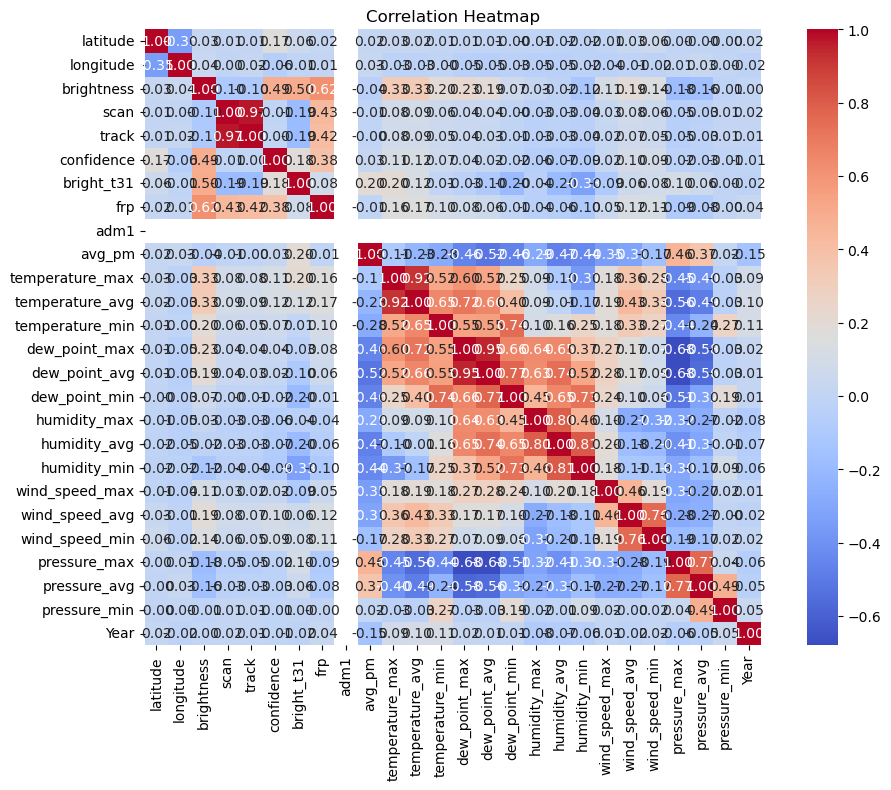

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# สร้าง correlation matrix
corr = bangkok_df.corr(numeric_only=True)  # เฉพาะ columns ที่เป็นตัวเลข

# วาด heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)

# ตั้งชื่อกราฟ
plt.title('Correlation Heatmap')
plt.show()
